## 1. Packages

In [1]:
using Graphs, StatsBase, Plots, Measures, GraphRecipes, LaTeXStrings

## 2. Regular-k Network



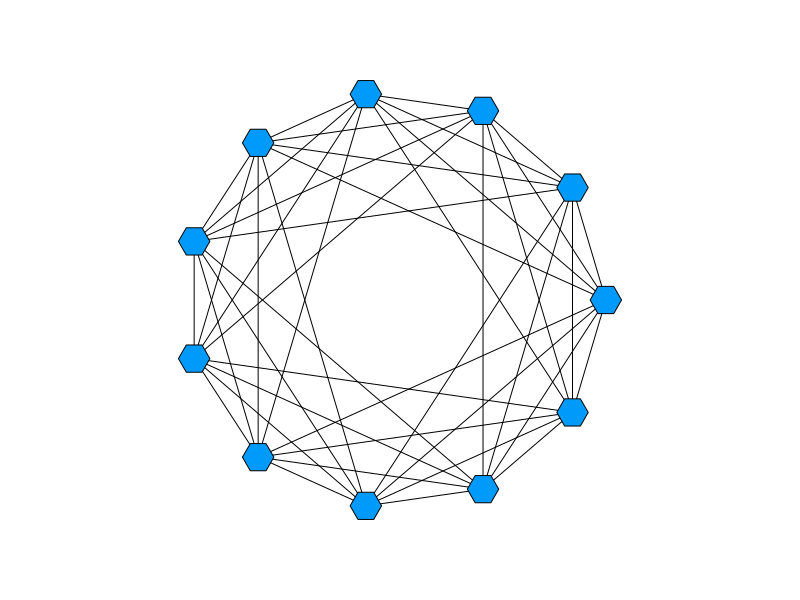

In [ ]:
g1 = watts_strogatz(11, 8, 0)
graphplot(g1, curves=false, method=:circular, nodesize=0.2, size=(800, 600))

## 3. ER Network



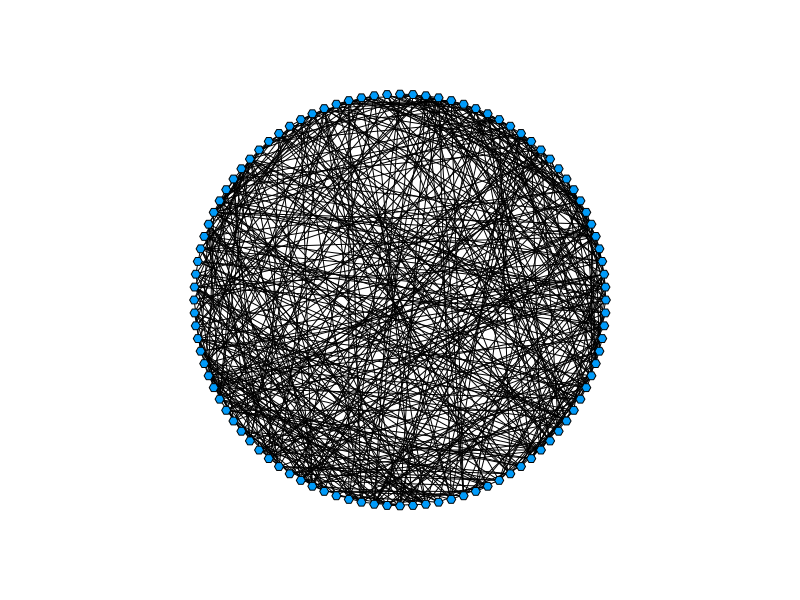

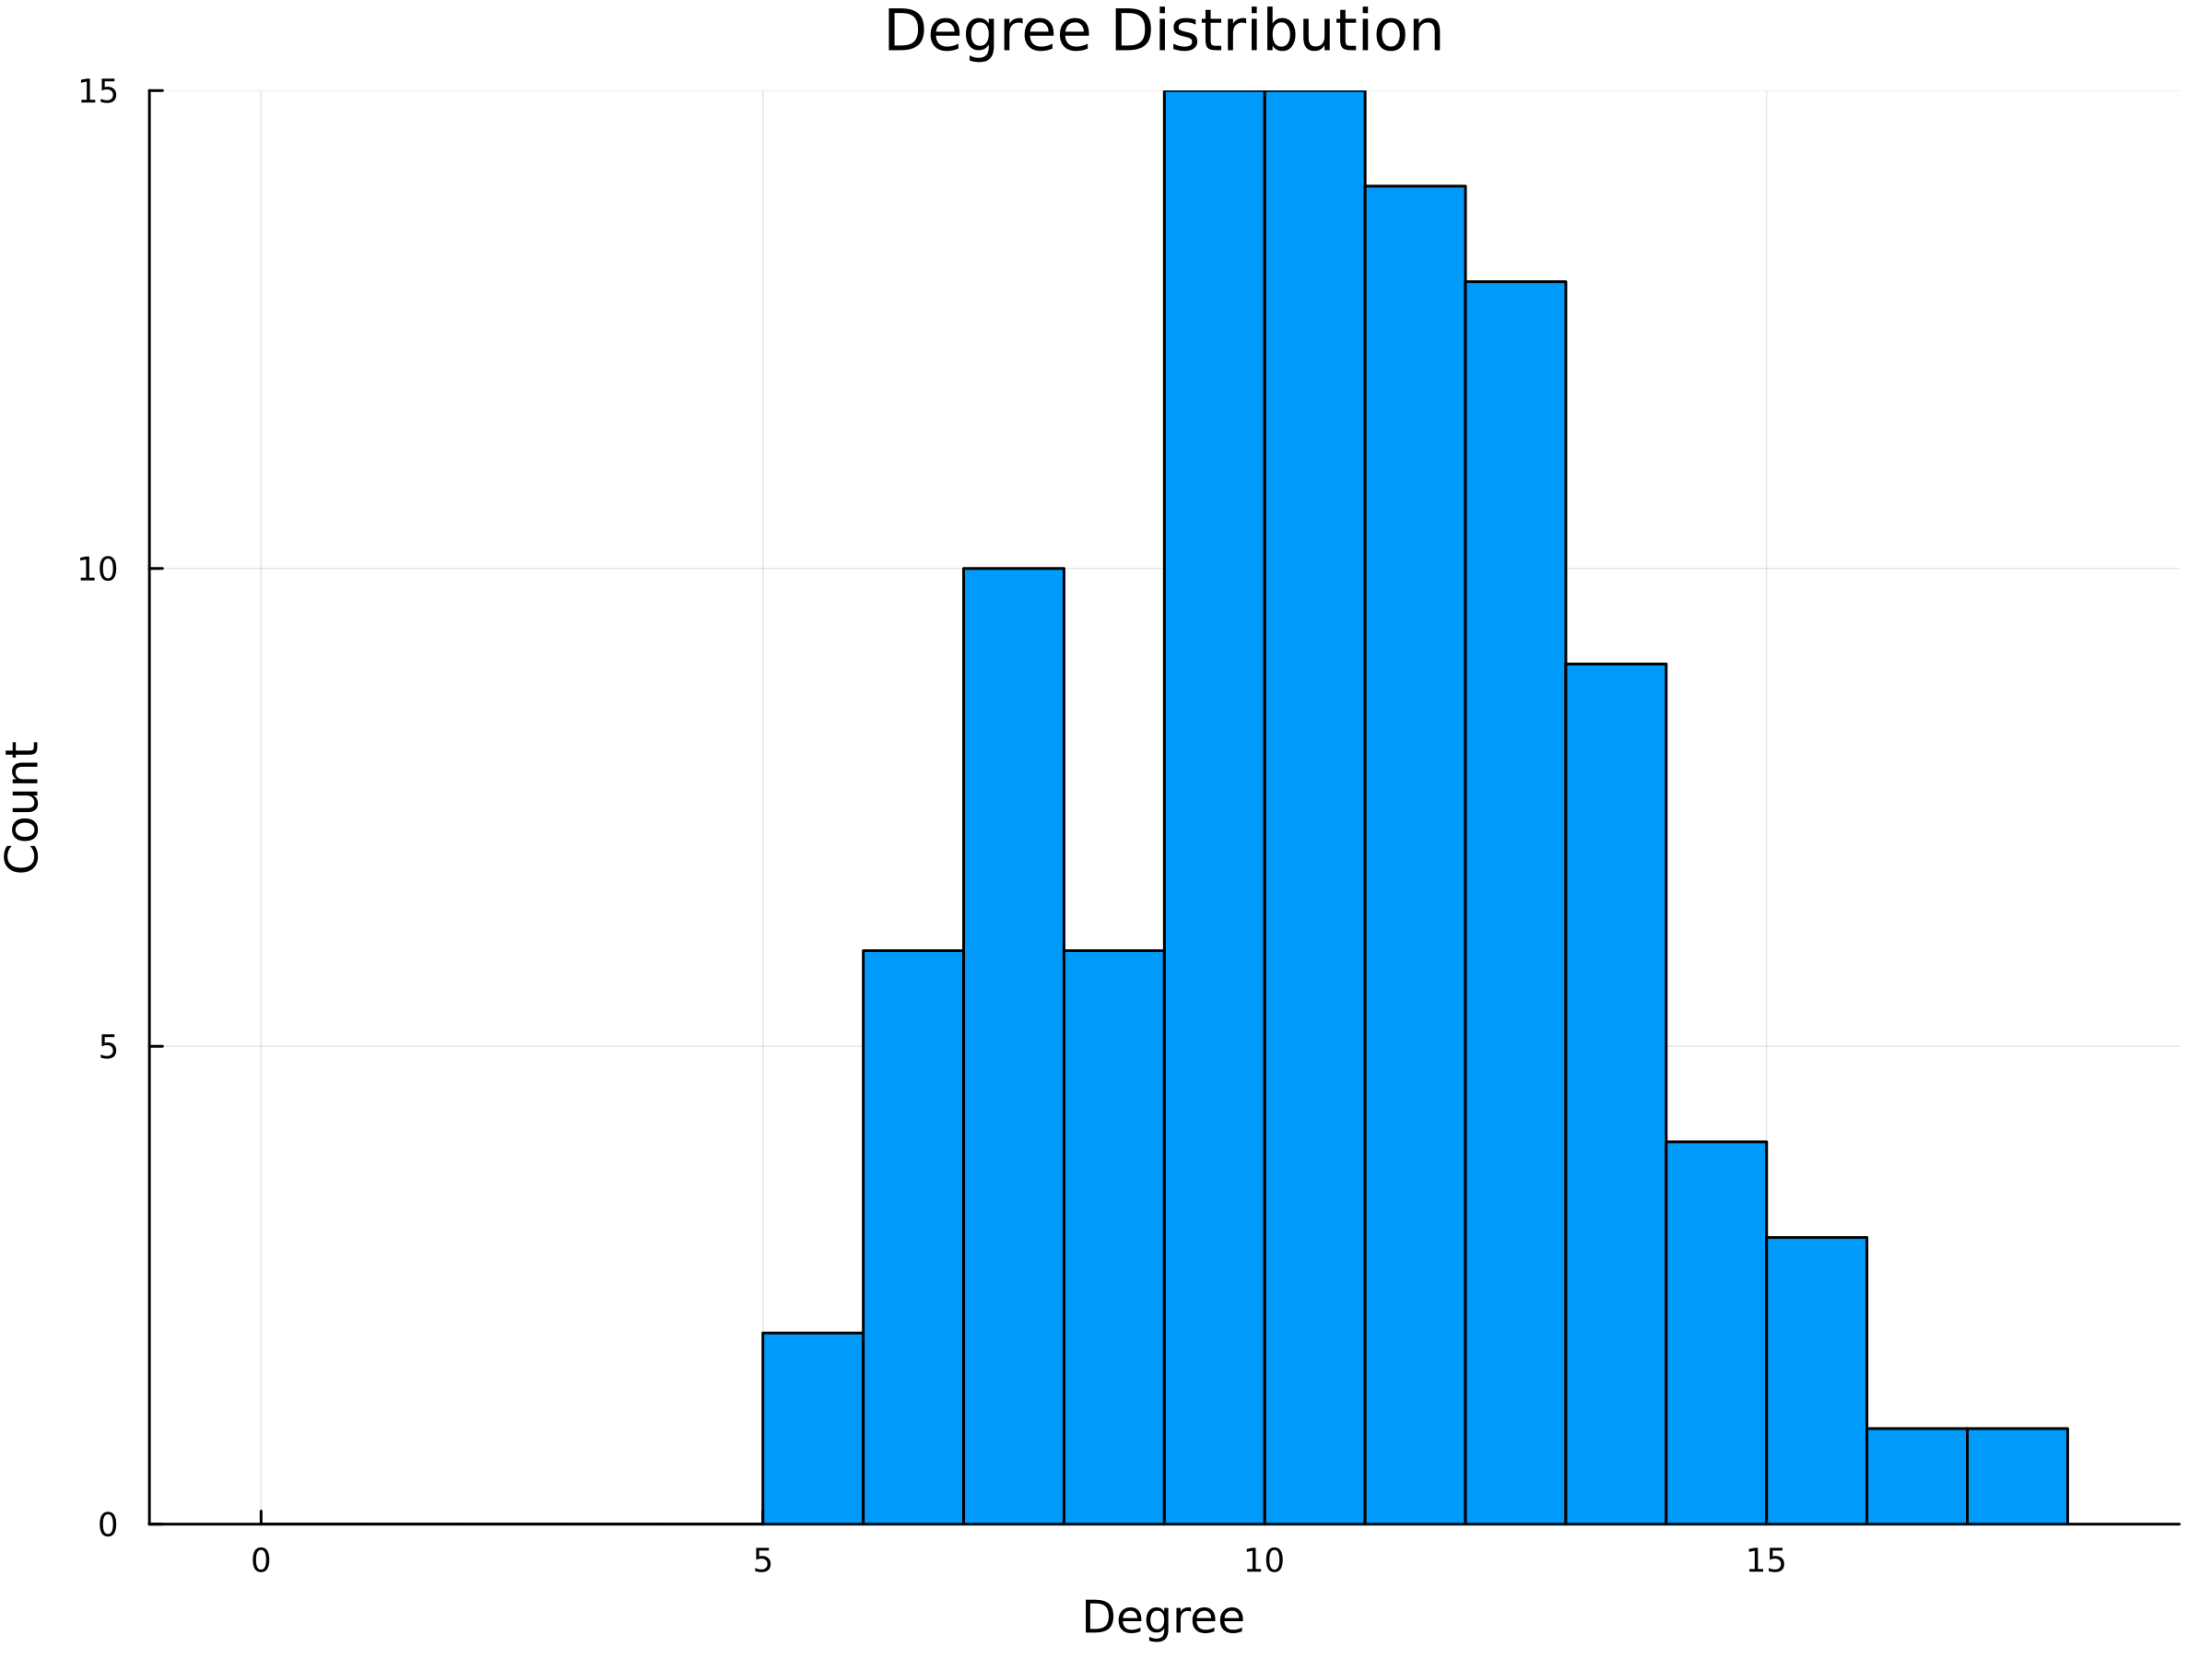

max-deg:18, min-deg:5, #links:514

In [ ]:
g2 = erdos_renyi(100, 0.1)
p1 = graphplot(g2, curves=false, method=:circular, nodesize=0.1, size=(800, 600))
p2 = histogram(degree(g2), bins=0:maximum(degree(g2)),
    xlabel="Degree",
    ylabel="Count",
    title="Degree Distribution",
    legend=false,
    dpi=300,
    size=(800, 600))
display(p1)
display(p2)
print("max-deg:" * string(maximum(degree(g2))), ", ", "min-deg:" * string(minimum(degree(g2))), ", ", "#links:" * string(ne(g2)))

## 4. BA (Scale-free) Network



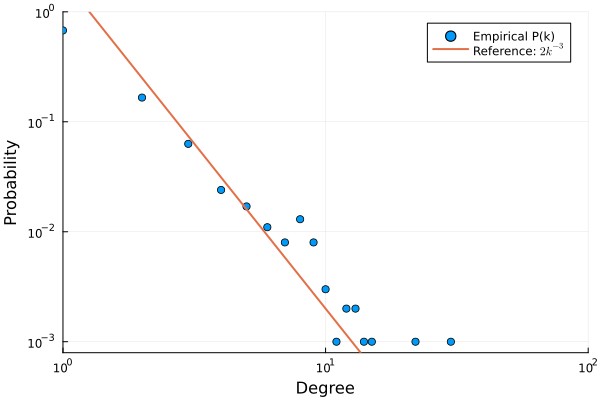

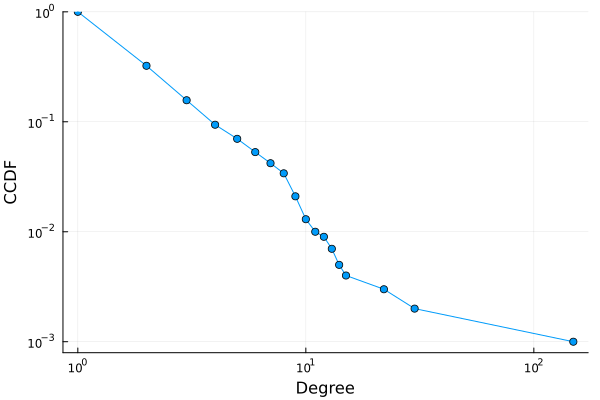

In [ ]:
g3 = barabasi_albert(1000, 1)

d = degree(g3)
degree_counts = countmap(d)

# Sort the unique degree values
unique_degrees = sort(collect(keys(degree_counts)))
frequencies = [degree_counts[k] for k in unique_degrees]

# Normalize the frequencies
total = sum(frequencies)
pmf = frequencies ./ total

# Log-Log PMF of Node Degrees
pt1 = scatter(unique_degrees, pmf,
    xscale=:log10, yscale=:log10,
    legend=:topright,
    xlabel="Degree",
    ylabel="Probability",
    xlims=(1, 10^2),
    ylims=(10^-3.1, 1.0),
    yticks=[10^-3, 10^-2, 10^-1, 1],
    label="Empirical P(k)"
)
# Add the x^-3 curve as a reference line
x_line = range(minimum(unique_degrees), stop=maximum(unique_degrees), length=100)
y_line = 2 ./ (x_line .^ 3)
plot!(pt1, x_line, y_line, linewidth=2, label="Reference: " * L"2k^{-3}", ylims=(10^-3.1, 1.0))

display(pt1)

# CCDF: P(K ≥ k)
ccdf = reverse(cumsum(reverse(pmf)))

# Log-Log CCDF of Node Degrees
pt2 = plot(unique_degrees, ccdf,
    xscale=:log10, yscale=:log10,
    legend=:none,
    marker=:circle,
    xlabel="Degree",
    ylabel="CCDF",
    ylims=(10^-3.1, 1.0),
    yticks=[10^-3, 10^-2, 10^-1, 1],
)

